In [1]:
from scipy.stats import entropy
import pandas
import numpy
from tqdm import tqdm
import sys

In [2]:
unique_sorted_increasing = numpy.arange(10**6)
unique_sorted_decreasing = numpy.flip(numpy.arange(10**6))
unique_random = numpy.arange(10**6)
numpy.random.shuffle(unique_random)

In [3]:
# compute shannon entropy for the unique value
def compute_shannon_entropy(target):
    pd_series = pandas.Series(target)
    counts = pd_series.value_counts()
    return entropy(counts)

In [4]:
def generate_pconstrained_random(size, n_classes = -1, random_quota=0.0):
    if n_classes == -1:
        n_classes = size
    random_elements = int(size * random_quota)
    constrained_elements = size - random_elements
    
    constrained_side = numpy.random.randint(low = 0, high = n_classes, size = constrained_elements) 
    unique_size = []
    if random_elements > 0:
        unique_size = range(constrained_elements, size)
    return numpy.concatenate([constrained_side, unique_size])

In [5]:
constrained_20_2_5 = generate_pconstrained_random(20, 20, 0)

In [16]:
# Plot relationship between size, classes and entropy
entropy_series = []
for size in numpy.linspace(1, 1000, num=50, dtype=int):
    for classes in numpy.linspace(1, 1000, num=50, dtype=int):
        entropy_series.append(
            (size, classes, compute_shannon_entropy(generate_pconstrained_random(size, classes)))
        )

In [17]:
#import plotly.graph_objects as go
x = numpy.array(entropy_series)[:,0]
y = numpy.array(entropy_series)[:,1]
z = numpy.array(entropy_series)[:,2]
#fig = go.Figure(data=[go.Surface(x=x,y=y,z=z)])
#fig.update_layout()
#fig.show()

In [18]:
from mpl_toolkits import mplot3d

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

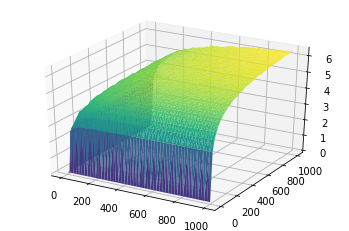

In [24]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none');

In [10]:
%%bash
pip install matplotlib